In [3]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

<IPython.core.display.Javascript object>


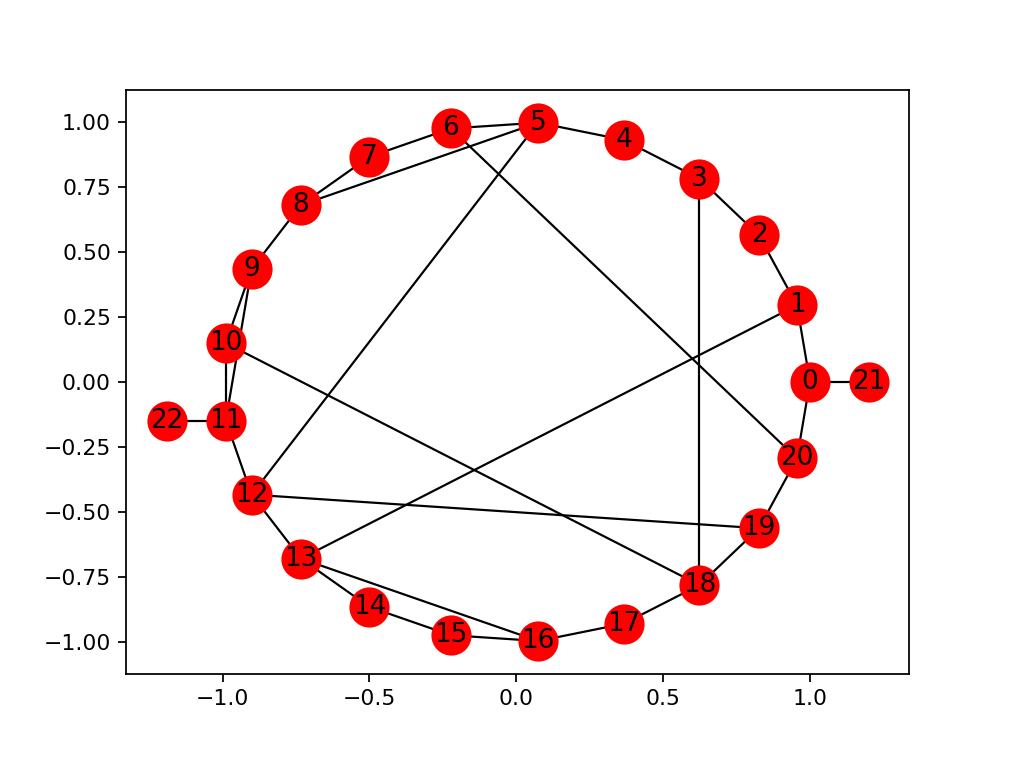

In [5]:
%matplotlib notebook

G = nx.newman_watts_strogatz_graph(21, 3, 0.2)
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

#add one ouput channel
G.add_edge(len(G),0)
pos[len(G)-1] = pos[0]+[0.2,0]
G.add_edge(len(G),11)
pos[len(G)-1] = pos[11]+[-0.2,0]

chi = np.array([ 1.j for i in range(len(G.edges))])

plt.figure()
nx.draw_networkx(G,pos=pos)

In [6]:
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)
naq_u1.set_chi((1.+1.j)*naq_u1.chi0)
naq_u1.update_laplacian()
        
L = naq_u1.L0.todense()

In [7]:
#setting up the parameters for the search
params = {}
params['s_min']     = 1e-4
params['s_size']    = np.asarray([0.1, 0.1])
params['max_steps'] = 1000
params['reduc']     = 1.
naq_u1.n_processes_scan = 4 #number of CPU to use

K = naq_u1.find_mode([10,0.04], params, disp=False, save_traj=True) #find one mode, and record the search trajectory

In [8]:
Ks = np.linspace(9,11,10)
Alphas = np.linspace(0,.15,10)

modes = naq_u1.find_modes(Ks, Alphas, params, th = 1e-3) #find many modes (start many searches in a grid)

14 modes out of 94 attempts


In [12]:
Ks = np.linspace(8,12,50)
Alphas = np.linspace(0,.15,50)

s = naq_u1.scan_k(Ks,Alphas) #compute a fine scan of the parameter space

<IPython.core.display.Javascript object>


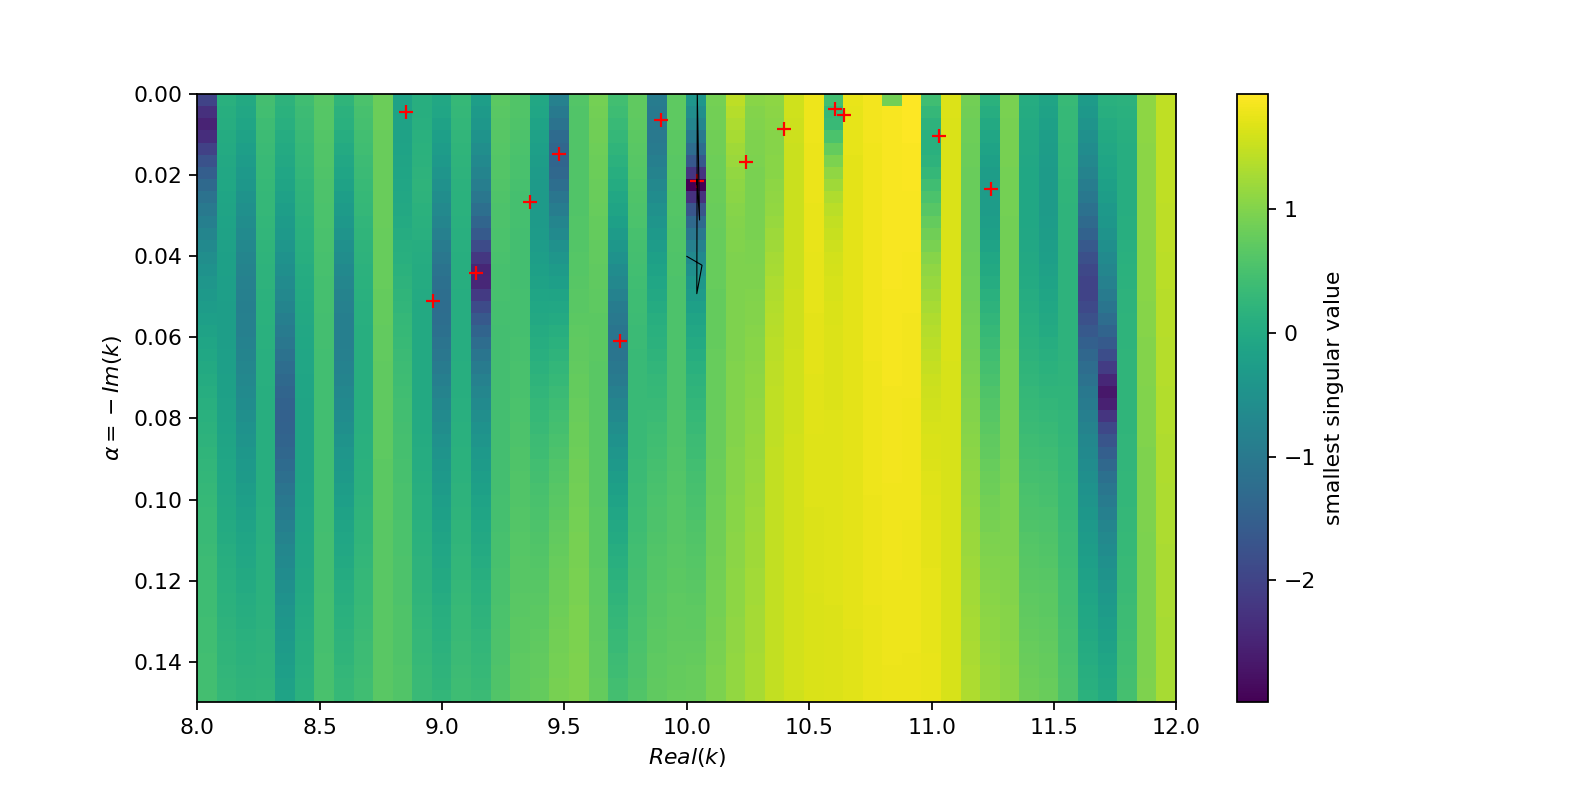

In [13]:
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.plot(K[:,0],K[:,1],'k-',lw=0.5)

k= (8.853701026146487-0.004452805613903014j)


<IPython.core.display.Javascript object>


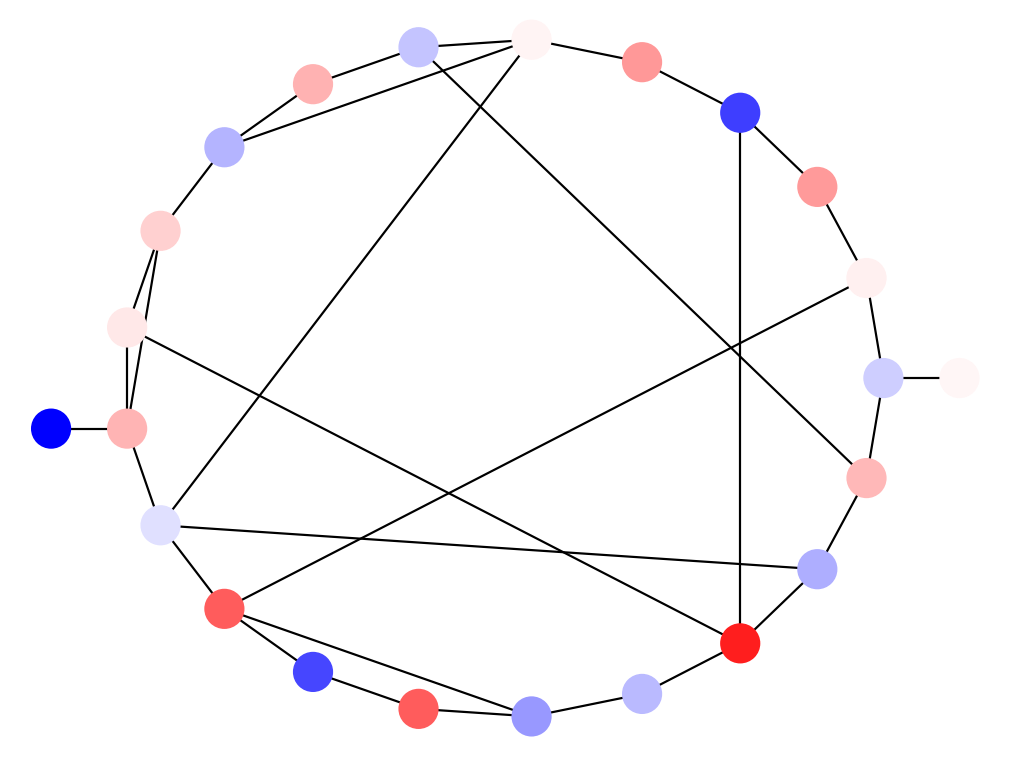

In [14]:
m = 0
print("k=", modes[m,0]-1j*modes[m,1])

naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
naq_u1.update_laplacian()
phi = naq_u1.compute_solution()
plt.figure()
nx.draw(G,pos=pos, node_color = np.real(phi),cmap='bwr',vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))


In [16]:
#pump parameters (see papers)
naq_u1.pump_params = {}
naq_u1.pump_params['gamma_perp'] = 1.
naq_u1.pump_params['k_a']        = 10.
naq_u1.pump_params['D0']         = 0 
naq_u1.pump_params['edges']      = [0,1,2]  #edges to pump

m = 2
naq_u1.update_chi(modes[m])
print("condition number no pump:", naq_u1.test_laplacian())

naq_u1.pump_params['D0']         = 1e-2
naq_u1.update_chi(modes[m])
print("condition number with pump:", naq_u1.test_laplacian())


condition number no pump: 7.438031e-05
condition number with pump: 0.008129064


In [ ]:
#find the pump trajectories
params['s_size']    = 1e-2*np.asarray([1.,1.])

#the correct balaance between s_size and the D0 steps must be found for each graph/pump
new_modes = naq_u1.pump_trajectories(modes, params, D0_max = 1e-3, D0_steps = 5)

In [ ]:
#plot the pump trajectories
naq_u1.plot_pump_traj(Ks, Alphas, s, modes, new_modes)